<b> Nama : Muhammad Alfhi Saputra </b> <br>
<b> NIM : 1301171205 </b>

In [1]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

Dataset SHP indonesia didownload dari 
https://github.com/alfhi24/Visualisasi-Data/blob/main/Geospatial%20Visualization/INDONESIA_PROP.shp

In [2]:
indo = gpd.read_file("INDONESIA_PROP.shp")
indo.head()

,ID,kode,Propinsi,SUMBER,geometry
0,1,85,IRIAN JAYA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((137.16585 -3.17501 0.00000, ..."
1,2,52,NUSATENGGARA BARAT,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((117.62720 -8.50640 0.00000, ..."
2,3,75,GORONTALO,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((122.18814 1.04530 0.00000, 1..."
3,4,74,SULAWESI TENGGARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((120.98423 -2.83534 0.00000, ..."
4,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"POLYGON Z ((110.01183 -7.88690 0.00000, 110.01..."


Proses di bawah adalah menjadikan nama provinsi ke dalam bentuk lower case, lalu menghapus provinsi Irian Jaya Timur dan mengubah beberapa nama provinsi untuk menyesuaikan dengan data Covid 19 Indonesia

In [3]:
# mengubah nama propinsi menjadi lowercase
indo['Propinsi'] = indo['Propinsi'].str.lower()
indo['Propinsi'].unique()

array(['irian jaya timur', 'nusatenggara barat', 'gorontalo',
       'sulawesi tenggara', 'daerah istimewa yogyakarta', 'jawa tengah',
       'probanten', 'jawa timur', 'maluku utara', 'maluku',
       'kalimantan selatan', 'kalimantan barat', 'sulawesi selatan',
       'dki jakarta', 'jawa barat', 'irian jaya tengah',
       'nusa tenggara timur', 'bali', 'riau', 'sulawesi tengah',
       'kalimantan timur', 'sulawesi utara', 'irian jaya barat',
       'sumatera utara', 'bangka belitung', 'sumatera barat',
       'kalimantan tengah', 'sumatera selatan', 'jambi', 'lampung',
       'bengkulu', 'di. aceh'], dtype=object)

In [4]:
# Menghapus irian jaya timur, karena di data covid tidak terdapat provinsi tersebut
indo = indo[indo.Propinsi != "irian jaya timur"]

In [5]:
indo = indo.set_index('Propinsi')

In [6]:
# mengubah beberapa nama provinsi untuk menyesuaikan dengan nama provinsi pada data covid
indo = indo.rename(index={"nusatenggara barat": "nusa tenggara barat", "irian jaya tengah": "papua", "probanten" : "banten", "bangka belitung" : "kepulauan bangka belitung", "di. aceh" : "aceh", "irian jaya barat" : "papua barat"})

In [7]:
indo = indo.reset_index()

In [8]:
indo.head()

,Propinsi,ID,kode,SUMBER,geometry
0,nusa tenggara barat,2,52,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((117.62720 -8.50640 0.00000, ..."
1,gorontalo,3,75,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((122.18814 1.04530 0.00000, 1..."
2,sulawesi tenggara,4,74,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((120.98423 -2.83534 0.00000, ..."
3,daerah istimewa yogyakarta,5,34,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"POLYGON Z ((110.01183 -7.88690 0.00000, 110.01..."
4,jawa tengah,6,3329,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((108.82934 -6.74608 0.00000, ..."


Dataset Covid19 Indonesia didownload di https://github.com/alfhi24/Visualisasi-Data/blob/main/Geospatial%20Visualization/covid_19_indonesia_time_series_all.csv

In [9]:
url = "https://raw.githubusercontent.com/alfhi24/Visualisasi-Data/main/Geospatial%20Visualization/covid_19_indonesia_time_series_all.csv"
cvd = pd.read_csv(url)
cvd.tail()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
8484,11/19/2020,ID-SG,Sulawesi Tenggara,70,0,0,70,5897,90,4399,1408,Province,NaN,Sulawesi Tenggara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,15,2.0,219,377.0,1911.0,38068,2635461,69.23,122.070311,-4.124689,26.56,2237.56,0.00,34.15,1.53%,74.60%,0.73,1.0
8485,11/19/2020,ID-SA,Sulawesi Utara,121,0,0,121,6235,220,4869,1146,Province,NaN,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,45.80,2360.06,0.00,83.27,3.53%,78.09%,17.29,1.0
8486,11/19/2020,ID-SB,Sumatera Barat,195,0,91,104,17903,316,13505,4082,Province,NaN,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,35.33,3243.74,0.00,57.25,1.77%,75.43%,0.93,1.0
8487,11/19/2020,ID-SS,Sumatera Selatan,44,13,40,-9,8899,481,6997,1421,Province,NaN,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,5.35,1082.93,1.58,58.53,5.41%,78.63%,0.88,6.5
8488,11/19/2020,ID-SU,Sumatera Utara,79,0,0,79,14676,573,11524,2579,Province,NaN,Sumatera Utara,Indonesia,Asia,Sumatera,UTC+07:00,NaN,25,8.0,450,693.0,5417.0,72981,14874889,203.82,99.051964,2.191894,5.31,986.63,0.00,38.52,3.90%,78.52%,0.93,1.0


In [10]:
# mengubah nama propinsi menjadi lowercase

cvd['Location'] = cvd['Location'].str.lower()
cvd['Location'].unique()

array(['dki jakarta', 'indonesia', 'jawa barat', 'riau', 'banten',
       'sulawesi tenggara', 'kalimantan timur',
       'daerah istimewa yogyakarta', 'sumatera utara', 'jawa tengah',
       'jawa timur', 'sulawesi selatan', 'maluku', 'papua',
       'maluku utara', 'aceh', 'kalimantan tengah', 'lampung',
       'sulawesi tengah', 'sumatera barat', 'papua barat',
       'kalimantan utara', 'sulawesi barat', 'sumatera selatan', 'bali',
       'kalimantan barat', 'jambi', 'kalimantan selatan',
       'kepulauan bangka belitung', 'kepulauan riau', 'bengkulu',
       'nusa tenggara barat', 'sulawesi utara', 'nusa tenggara timur',
       'gorontalo'], dtype=object)

In [11]:
# Menghapus beberapa provinsi pada data covid provinsi berikut karena tidak terdapat pada data SHP nya

cvd = cvd[cvd.Location != "kalimantan utara"]
cvd = cvd[cvd.Location != "sulawesi barat"]
cvd = cvd[cvd.Location != "kepulauan riau"]

In [12]:
# Mengambil data pada tanggal 11/19/2020

tgl = cvd["Date"]=="11/19/2020"
tgl.head()

0    False
1    False
2    False
3    False
4    False
Name: Date, dtype: bool

Merge data shp dengan data covid berdasarkan provinsi

In [13]:
cv19 = indo.merge(cvd[tgl], left_on="Propinsi", right_on="Location")
cv19.head()

,Propinsi,ID,kode,SUMBER,geometry,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,nusa tenggara barat,2,52,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((117.62720 -8.50640 0.00000, ...",11/19/2020,ID-NB,nusa tenggara barat,16,0,0,16,4444,229,3542,673,Province,NaN,Nusa Tenggara Barat,Indonesia,Asia,Nusa Tenggara,UTC+08:00,NaN,8,2.0,117,145.0,995.0,18572,5270247,283.77,117.508626,-8.606999,3.04,843.22,0.0,43.45,5.15%,79.70%,0.76,1.0
1,gorontalo,3,75,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((122.18814 1.04530 0.00000, 1...",11/19/2020,ID-GO,gorontalo,0,0,0,0,3057,86,2892,79,Province,NaN,Gorontalo,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,5,1.0,77,72.0,657.0,11257,1180651,104.88,122.376058,0.687003,0.00,2589.25,0.0,72.84,2.81%,94.60%,0.00,1.0
2,sulawesi tenggara,4,74,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((120.98423 -2.83534 0.00000, ...",11/19/2020,ID-SG,sulawesi tenggara,70,0,0,70,5897,90,4399,1408,Province,NaN,Sulawesi Tenggara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,15,2.0,219,377.0,1911.0,38068,2635461,69.23,122.070311,-4.124689,26.56,2237.56,0.0,34.15,1.53%,74.60%,0.73,1.0
3,daerah istimewa yogyakarta,5,34,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"POLYGON Z ((110.01183 -7.88690 0.00000, 110.01...",11/19/2020,ID-YO,daerah istimewa yogyakarta,108,0,0,108,4936,114,3597,1225,Province,NaN,Daerah Istimewa Yogyakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Istimewa,4,1.0,78,46.0,392.0,3133,3631015,1158.90,110.444878,-7.894502,29.74,1359.40,0.0,31.40,2.31%,72.87%,0.71,0.0
4,jawa tengah,6,3329,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((108.82934 -6.74608 0.00000, ...",11/19/2020,ID-JT,jawa tengah,443,0,151,292,45740,1971,32453,11316,Province,NaN,Jawa Tengah,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,6.0,576,753.0,7809.0,32801,36364072,1108.64,110.201115,-7.259097,12.18,1257.83,0.0,54.20,4.31%,70.95%,0.89,0.0


Plotting total kasus covid 19 per 1 juta penduduk

Text(0.5, 1.0, 'COVID-19 total cases per/million on 11/19/2020')

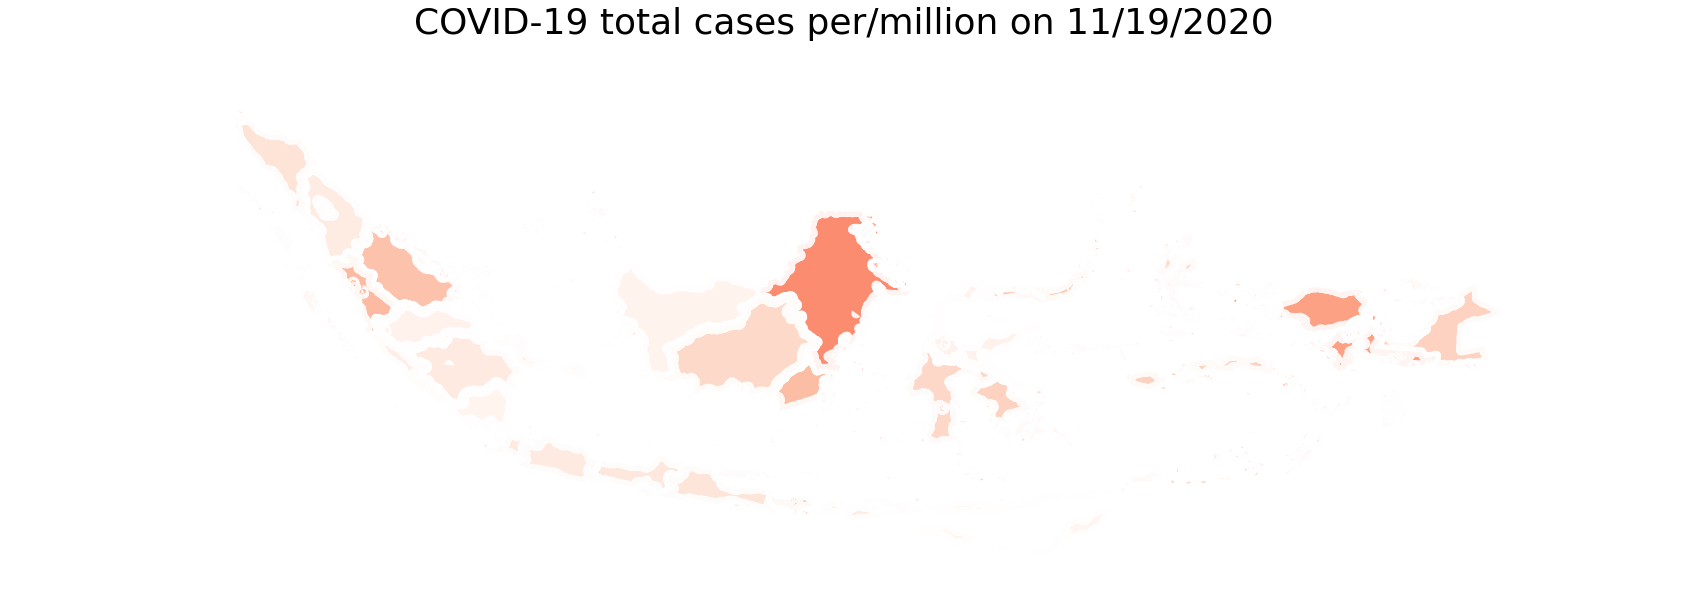

In [14]:
ax = gplt.choropleth(
    cv19,
    hue="Total Cases per Million",
    edgecolor="white",
    linewidth=10,
    cmap="Reds",
    alpha = 0.9,
    projection=gcrs.AlbersEqualArea(),
    figsize=(30, 30)
)


ax.set_title(
    fontsize=36
)